In [1]:
import warnings
warnings.filterwarnings('ignore')

## Exercise 1:

### Google Trends presentation

Imagine you are asked to put together a presentation of how a client's Google trends work across markets.

- How could do it in a way that reduced the manual work?

- How can we leverage Python's features and 3rd party libraries to automate this work?

- Does it make sense to automate it all the way?

### Part 1: Working with CSV files


#### 1 - Download the data

- Navigate to https://trends.google.com/trends/explore?date=2021-05-01%202021-05-31&geo=AU-ACT&q=%2Fm%2F08h9qn

- Download the csv file of the trends you want to chart

#### 2 - Import Pandas package

In [2]:
import pandas as pd

#### 3 - Read in the data into a pandas DataFrame

In [3]:
df = pd.read_csv('data/1_trends/officeworks/5-21_aus.csv', header=1, index_col="Day") 

##### Note:
- *We are using a "read_csv" method. If your file was excel you'd need to use "read_excel"*

- *We are using a "header" argument. This is tell pandas which row has the headers, notice it is "1", not "2" - why?"*

- *We are setting an "index column" we'll discuss this more when we look at Pandas next week*

#### 4 - Review the data

In [4]:
df.head() # Shows the first 5 rows

,Officeworks: (Australia)
Day,
2021-05-01,78
2021-05-02,90
2021-05-03,80
2021-05-04,87
2021-05-05,89


<AxesSubplot:xlabel='Day'>

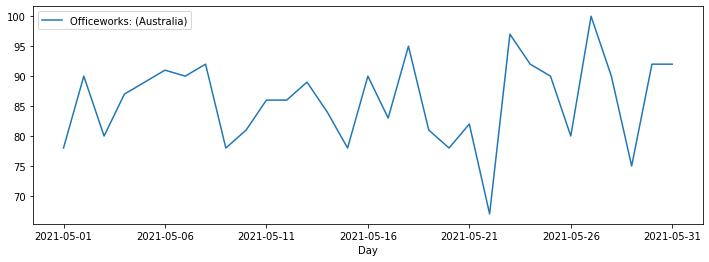

In [5]:
df.plot(figsize=(12,4)) # Plots the data

In [6]:
df.mean() # Find the average metric

Officeworks: (Australia)    85.903226
dtype: float64

In [7]:
df[df["Officeworks: (Australia)"]==100] # Find the day of the max metric

,Officeworks: (Australia)
Day,
2021-05-27,100


#### 5 - Read in market data for NSW

In [8]:
df_nsw = pd.read_csv('data/1_trends/officeworks/5-21_nsw.csv', header=1, index_col="Day") 

<AxesSubplot:xlabel='Day'>

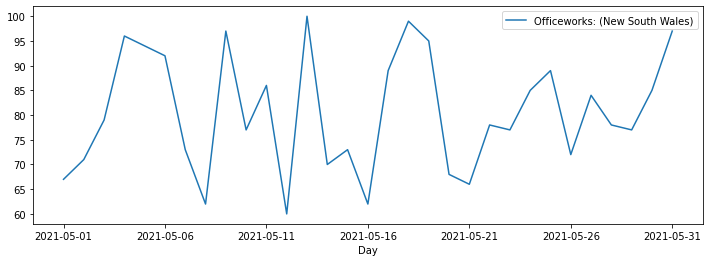

In [9]:
df_nsw.plot(figsize=(12,4))

#### 6 - Get all market data

In [10]:
df_vic = pd.read_csv('data/1_trends/officeworks/5-21_vic.csv', header=1, index_col="Day") 
df_qld = pd.read_csv('data/1_trends/officeworks/5-21_qld.csv', header=1, index_col="Day") 

df_comb1 = df_nsw.join(df_vic)
df_combined = df_comb1.join(df_qld)

<AxesSubplot:xlabel='Day'>

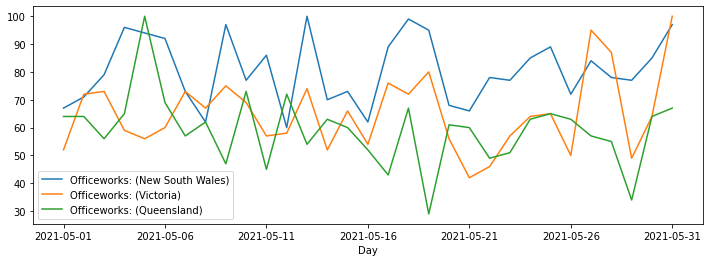

In [11]:
df_combined.plot(figsize=(12,4))

#### 7 - How could we do that better?

In [ ]:
# 1) make a list of all the markets
markets = ["nsw", "vic", "qld", "wa"] 

# 2) make an empty list for the dataframes
dfs = []

# 3) loop through all the markets and append its dataframe to the list
for market in markets:
    csv_path = f"data/1_trends/officeworks/5-21_{market}.csv"
    dfs.append(pd.read_csv(csv_path, header=1, index_col="Day"))

# 4) combine the list of dataframes
df_combined = pd.concat(dfs, axis=1)


df_combined.plot(figsize=(12,4))

#### 8 - Exercise - Create the same chart for "Johnson & Johnson"?

In [ ]:
# 1) make a list of all the markets
markets = ["nsw", "vic", "qld","wa"] 

# 2) make an empty list for the dataframes
dfs = []

# 3) loop through all the markets and append its dataframe to the list
for market in markets:
    try:
        csv_path = f"data/1_trends/officeworks/5-21_{market}.csv"
        dfs.append(pd.read_csv(csv_path, header=1, index_col="Day"))
    except:
        pass
# 4) combine the list of dataframes
df_combined = pd.concat(dfs, axis=1)


df_combined.plot(figsize=(12,4))

#### 9 - Exercise - Create the same chart for "Lotterywest"?

#### 10 - How could our script be more flexible?


In [ ]:
# Rather than needing to stick to a standard file naming convention, we can loop 
# through all files in the directory

# First define the messy stuff as functions
FIG_SIZE = (12,4)
def get_df(csv_path): 
    return pd.read_csv(csv_path, header=1, index_col="Day")

import os

for client in ["officeworks", "j_n_j", "lotterywest"]:
    csv_location = f"data/1_trends/{client}/"
    csv_files = [f for f in os.listdir(csv_location) if f.endswith("csv")] # loop through dir
    csv_paths = [csv_location + f for f in csv_files] # get the path names
    dfs = [get_df(f) for f in csv_paths] # create the dataframes
    combined_df = pd.concat(dfs, axis=1)
    combined_df.plot(figsize=FIG_SIZE)

______________

### Part 2: Google Trends API

#### 1 - Install the pytrends library

In [ ]:
pip install pytrends

#### 2 - Follow the instructions to construct a request

In [ ]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-AU', tz=600) # create a new pytrends object

In [ ]:
kw_list = ["Officeworks"] # build a keyword list
pytrends.build_payload(kw_list,timeframe="2021-05-01 2021-05-31", geo="AU-VIC") #build a payload
df = pytrends.interest_over_time() # get the data
df.head()

#### 3 - Format the DataFrame to use original column names

In [ ]:
df.index.name="Day"
df.rename(columns={"Officeworks":"Officeworks: (Victoria)"}, inplace=True)
df.drop("isPartial", axis=1, inplace=True)
df.head()

#### 4 - Exercise build the plots again using pytrends package

In [ ]:
# First define constants

client_list = ["Officeworks", "Johnson & Johnson", "Lotterywest"]
market_dict = {
    "AU-NSW": "New South Wales",
    "AU-VIC": "Victoria",
    "AU-QLD": "Queensland",
}
FIG_SIZE = (12, 4)

In [ ]:
# Second define utility functions
def format_df(df, keyword, market):
    ...
    return df

def get_trends_df(client, market, start_date, end_date):
    ...
    return format_df(df, client, market)
    
    

In [ ]:
# Third define final script
def plot_trends(client_list, market_list, start_date, end_date):
    for client in client_list:
        dfs = []
        for market in market_list:
            print(f"Collecting trends for {client} in {market}")
            dfs.append(get_trends_df(client, market, start_date, end_date))
        pd.concat(dfs, axis=1).plot(figsize=FIG_SIZE)
    

    
    

In [ ]:
# Run script
plot_trends(client_list, market_dict,"2021-05-01", "2021-05-31" )